# Author: Narendra singh rawat
# Email: rawatnarendra009@gmail.com
# Designation: Data Scientist

# Classification of Eligibility of Patients to go through Operation (Part-1)

Logistic regression is a linear model but with a nonlinear response. The response is binary, 
{
0
,
1
}
, or Yes and No. The response is the prediction of the category.

In this session you will learn the following:

How to prepare data for classification models using scikit-learn.
EDA
Data Cleaning
Data Enrichment
Statistical Checks
Drawing Insights from the data
Constructing a classification model using scikit-learn.
Evaluating the performance of the classification model.
Basics of logistic regression

In this section some basic properties of the logistic regression model are presented.

Logistic regression is widely used as a classification model. Logistic regression is linear model, with a binary response, {False, True} or {0, 1}. You can think of this response as having a Binomial distribution. For linear regression the response is just, well, linear. Logistic regression is a linear regression model with a nonlinear output. The response of the linear model is transformed or 'squashed' to values close to 0 and 1 using a sigmoidal function, also known as the logistic function. The result of this transformation is a response which is the log likelihood for each of the two classes.

First, execute the code in the cell below to load the packages required to run this notebook.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import math
import seaborn as sns
from scipy import stats
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the data
patients = pd.read_csv(r'C:\Users\rawat\Downloads\Brazil_Patients_Datac.csv')
patients.head()

,Patient_ID,Age,Region,Bone,Blood,Lung,Skin,Urological,Heart,Other,Criticality,Operation
0,43191,64.0,Rio De Janerio,1733.0,1141.0,1114.0,118.0,780.0,8915.0,4029.0,Level-1,No
1,43221,78.0,Sao Paulo,1789.0,1205.0,1278.0,126.0,915.0,9589.0,4276.0,Level-2,No
2,43252,81.0,Manaus,1907.0,1143.0,1149.0,119.0,856.0,9339.0,4165.0,Level-3,Yes
3,43282,77.0,Salvador,1730.0,1210.0,1303.0,124.0,906.0,9710.0,4437.0,Level-3,Yes
4,43313,72.0,Curitiba,1733.0,1193.0,1177.0,115.0,871.0,9259.0,4170.0,Level-3,Yes


In [4]:
patients.shape

(2502, 12)

# EDA

In [4]:
patients.describe()

,Patient_ID,Age,Bone,Blood,Lung,Skin,Urological,Heart,Other
count,2502.000000,2496.000000,2499.000000,2499.000000,2494.000000,2497.000000,2499.000000,2493.000000,2500.000000
mean,49036.891687,74.883013,6338.392157,2831.777111,2533.215718,3519.861834,1186.064426,28169.691937,7840.073200
std,3467.697487,7.024430,3302.313609,1493.556560,1374.005987,2240.896920,1716.933672,14674.423459,3742.536141
min,43191.000000,-10.000000,1052.000000,508.000000,405.000000,102.000000,303.000000,5770.000000,2102.000000
25%,46016.500000,70.000000,3371.000000,1484.000000,1243.250000,1470.000000,558.000000,14519.000000,4242.250000
50%,49057.500000,75.000000,6198.000000,2695.000000,2474.500000,3589.000000,784.000000,27121.000000,7670.500000
75%,52042.000000,80.000000,9426.500000,4172.000000,3765.250000,5553.000000,998.000000,41873.000000,11352.750000
max,54992.000000,220.000000,12103.000000,5851.000000,5003.000000,7303.000000,11019.000000,53791.000000,14281.000000


# Finding Duplicates

In [5]:
duplicate = patients[patients.duplicated()]
 
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,Patient_ID,Age,Region,Bone,Blood,Lung,Skin,Urological,Heart,Other,Criticality,Operation
86,50258,70.0,Natal,1900.0,1127.0,1145.0,118.0,848.0,9281.0,4143.0,Level-3,Yes
386,53112,83.0,Manaus,2511.0,568.0,1095.0,276.0,1896.0,8599.0,2253.0,Level-2,Yes


In [6]:
patients.drop_duplicates(inplace=True)

# Null Value Checks

In [7]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2501
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Patient_ID   2500 non-null   int64  
 1   Age          2494 non-null   float64
 2   Region       2500 non-null   object 
 3   Bone         2497 non-null   float64
 4   Blood        2497 non-null   float64
 5   Lung         2492 non-null   float64
 6   Skin         2495 non-null   float64
 7   Urological   2497 non-null   float64
 8   Heart        2491 non-null   float64
 9   Other        2498 non-null   float64
 10  Criticality  2500 non-null   object 
 11  Operation    2500 non-null   object 
dtypes: float64(8), int64(1), object(3)
memory usage: 253.9+ KB


In [7]:
patients.fillna(patients.mean(),inplace=True)

In [9]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2501
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Patient_ID   2500 non-null   int64  
 1   Age          2500 non-null   float64
 2   Region       2500 non-null   object 
 3   Bone         2500 non-null   float64
 4   Blood        2500 non-null   float64
 5   Lung         2500 non-null   float64
 6   Skin         2500 non-null   float64
 7   Urological   2500 non-null   float64
 8   Heart        2500 non-null   float64
 9   Other        2500 non-null   float64
 10  Criticality  2500 non-null   object 
 11  Operation    2500 non-null   object 
dtypes: float64(8), int64(1), object(3)
memory usage: 253.9+ KB


# Statistical Checks

In [10]:
patients.describe()

,Patient_ID,Age,Bone,Blood,Lung,Skin,Urological,Heart,Other
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,49034.773200,74.881716,6341.702443,2833.366440,2534.349920,3522.525451,1185.915499,28185.131273,7843.789832
std,3468.040256,7.016248,3299.568997,1492.180407,1371.772406,2237.575006,1716.518039,14643.744068,3740.133992
min,43191.000000,-10.000000,1052.000000,508.000000,405.000000,102.000000,303.000000,5770.000000,2102.000000
25%,46014.750000,70.000000,3374.750000,1489.250000,1248.750000,1479.750000,558.000000,14571.750000,4248.500000
50%,49047.500000,75.000000,6210.000000,2703.500000,2483.000000,3588.000000,785.000000,27209.500000,7701.000000
75%,52042.000000,80.000000,9425.250000,4171.000000,3759.250000,5547.000000,998.250000,41861.250000,11352.750000
max,54992.000000,220.000000,12103.000000,5851.000000,5003.000000,7303.000000,11019.000000,53791.000000,14281.000000


# Outliers Check

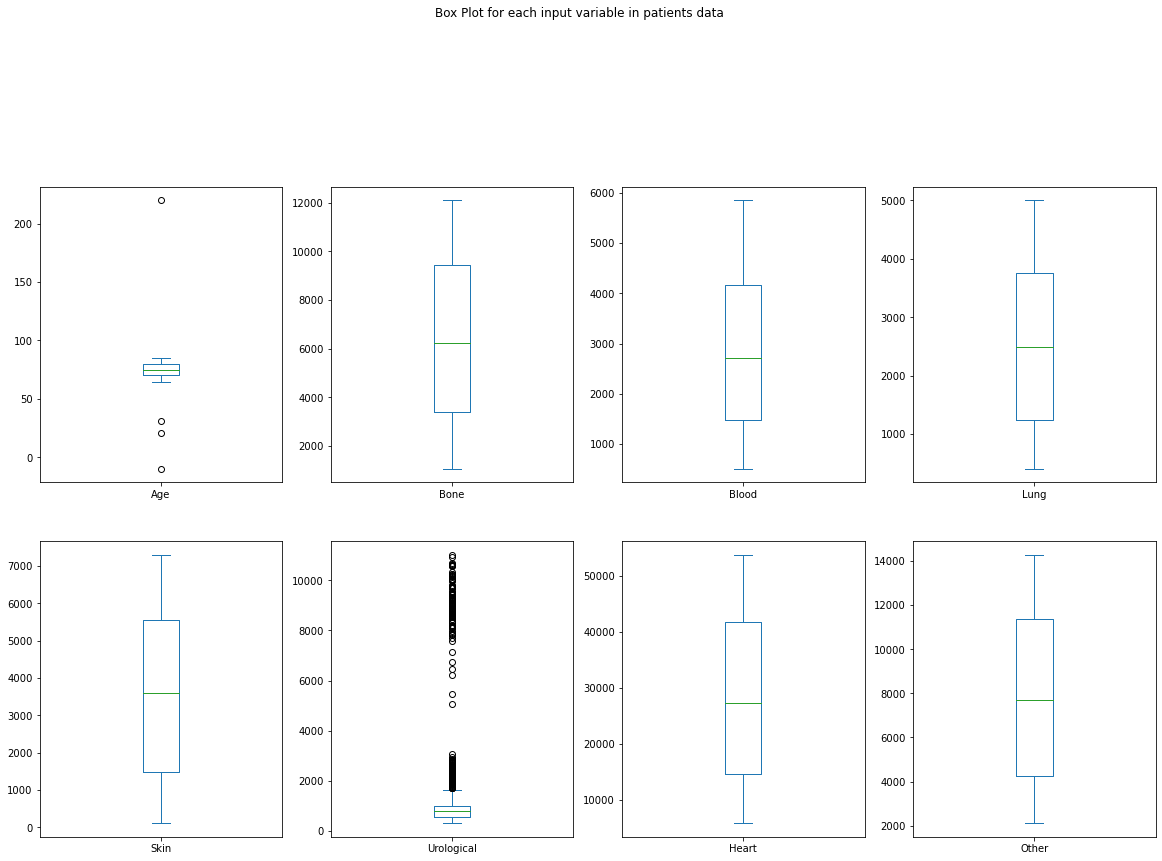

In [8]:
drop_cols = ['Patient_ID','Region','Criticality','Operation']
patients.drop(drop_cols, axis=1).plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(20,25), 
                                        title='Box Plot for each input variable in patients data')
plt.savefig('patients_boxplot')
plt.show()

Text(0.5, 0, 'Value of Urological')

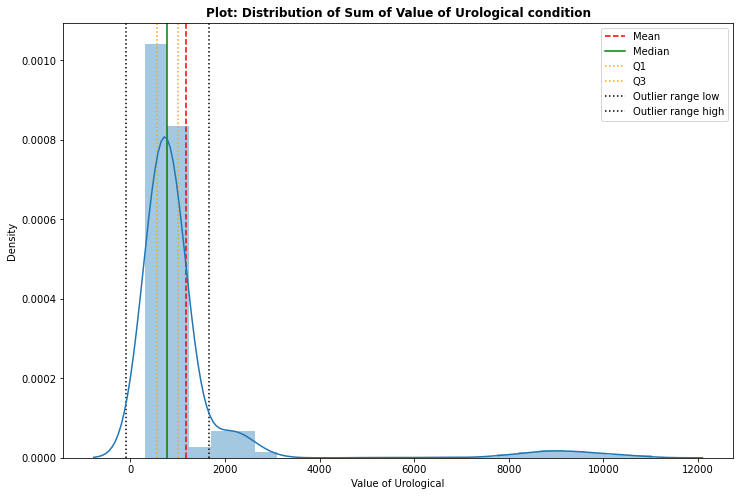

In [9]:
#Plotting distribution curve of data
low=np.percentile(patients["Urological"],25)
up=np.percentile(patients["Urological"],75)
iqr_Value = stats.iqr(patients["Urological"])
low_Value=low-iqr_Value*1.5
up_Value=up+iqr_Value*1.5



plt.figure(figsize=(12,8))
plt.title("Plot: Distribution of Sum of Value of Urological condition",weight='bold')
# 
mean_weight=np.mean(patients["Urological"])
median_weight=np.median(patients["Urological"])

Q1=np.percentile(patients["Urological"],25)
Q3=np.percentile(patients["Urological"],75)
plt.axvline(x=mean_weight,color='red',ls='--',label='Mean')
plt.axvline(x=median_weight,color='green',ls='-',label='Median')
plt.axvline(x=Q1,color='orange',ls=':',label='Q1')
plt.axvline(x=Q3,color='orange',ls=':',label='Q3')
plt.axvline(x=low_Value,color='black',ls=':',label='Outlier range low')
plt.axvline(x=up_Value,color='black',ls=':',label='Outlier range high')

plt.legend()
sns.distplot(patients["Urological"],bins=23)
plt.xlabel("Value of Urological")

Text(0.5, 0, 'Value of Age')

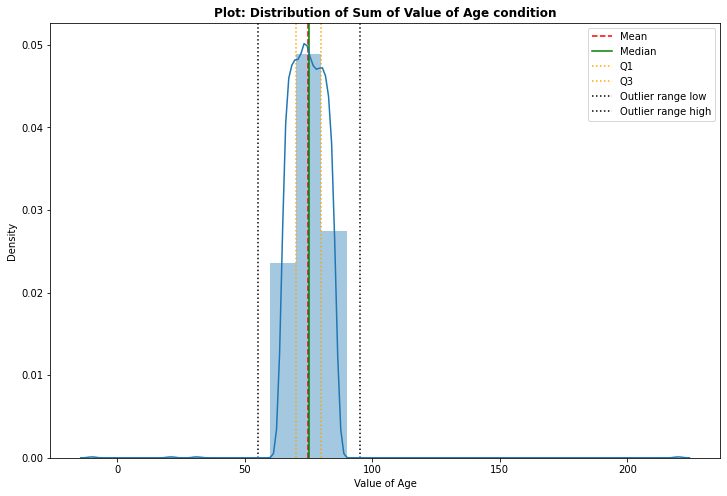

In [13]:
#Plotting distribution curve of data
low=np.percentile(patients["Age"],25)
up=np.percentile(patients["Age"],75)
iqr_Value = stats.iqr(patients["Age"])
low_Value=low-iqr_Value*1.5
up_Value=up+iqr_Value*1.5



plt.figure(figsize=(12,8))
plt.title("Plot: Distribution of Sum of Value of Age condition",weight='bold')
# 
mean_weight=np.mean(patients["Age"])
median_weight=np.median(patients["Age"])

Q1=np.percentile(patients["Age"],25)
Q3=np.percentile(patients["Age"],75)
plt.axvline(x=mean_weight,color='red',ls='--',label='Mean')
plt.axvline(x=median_weight,color='green',ls='-',label='Median')
plt.axvline(x=Q1,color='orange',ls=':',label='Q1')
plt.axvline(x=Q3,color='orange',ls=':',label='Q3')
plt.axvline(x=low_Value,color='black',ls=':',label='Outlier range low')
plt.axvline(x=up_Value,color='black',ls=':',label='Outlier range high')

plt.legend()
sns.distplot(patients["Age"],bins=23)
plt.xlabel("Value of Age")

<AxesSubplot:xlabel='Criticality,Operation'>

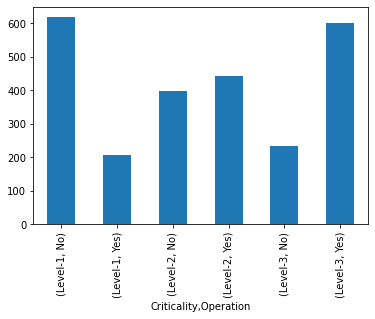

In [10]:
#Which category of criticality is favoured for operation?
patients.groupby(['Criticality','Operation'])['Patient_ID'].count().plot(kind='bar')

# Replacing Outliers with Median values

In [11]:
median1 = patients.loc[patients['Age']<85, 'Age'].median()
patients.loc[patients.Age > 85, 'Age'] = np.nan
patients.fillna(median1,inplace=True)

In [12]:
median2 = patients.loc[patients['Age']>60, 'Age'].median()
patients.loc[patients.Age < 60, 'Age'] = np.nan
patients.fillna(median2,inplace=True)

In [13]:
median3 = patients.loc[patients['Urological']<1380, 'Urological'].median()
patients.loc[patients.Urological > 1380, 'Urological'] = np.nan
patients.fillna(median3,inplace=True)

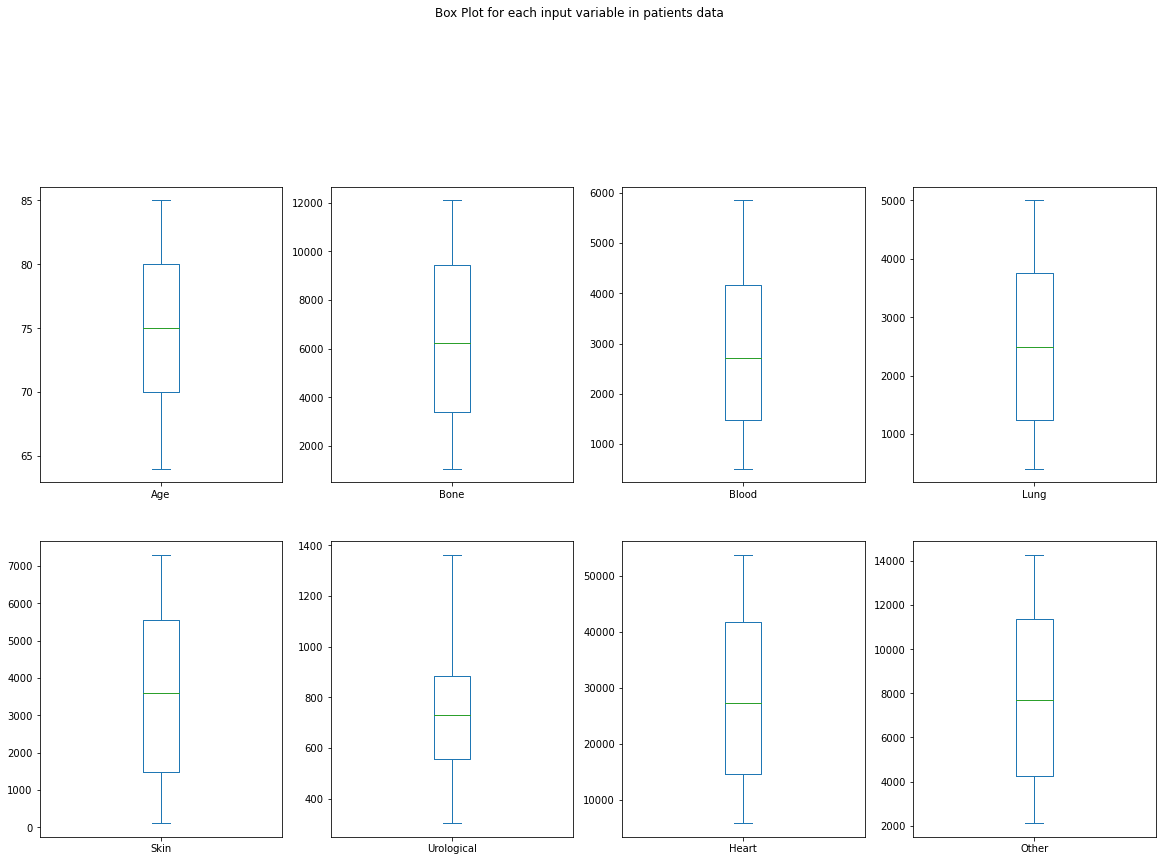

In [14]:
drop_cols = ['Patient_ID','Region','Criticality','Operation','Criticality']
patients.drop(drop_cols, axis=1).plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(20,25), 
                                        title='Box Plot for each input variable in patients data')
plt.savefig('patients_boxplot')
plt.show()

Text(0.5, 0, 'Value of Urological')

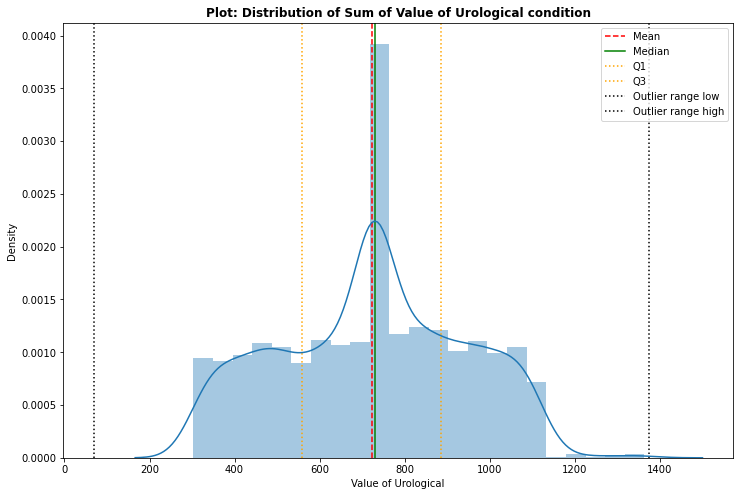

In [15]:
#Plotting distribution curve of data
low=np.percentile(patients["Urological"],25)
up=np.percentile(patients["Urological"],75)
iqr_Value = stats.iqr(patients["Urological"]) 
iqr_Value
low_Value=low-iqr_Value*1.5
up_Value=up+iqr_Value*1.5



plt.figure(figsize=(12,8))
plt.title("Plot: Distribution of Sum of Value of Urological condition",weight='bold')
# 
mean_weight=np.mean(patients["Urological"])
median_weight=np.median(patients["Urological"])

Q1=np.percentile(patients["Urological"],25)
Q3=np.percentile(patients["Urological"],75)
plt.axvline(x=mean_weight,color='red',ls='--',label='Mean')
plt.axvline(x=median_weight,color='green',ls='-',label='Median')
plt.axvline(x=Q1,color='orange',ls=':',label='Q1')
plt.axvline(x=Q3,color='orange',ls=':',label='Q3')
plt.axvline(x=low_Value,color='black',ls=':',label='Outlier range low')
plt.axvline(x=up_Value,color='black',ls=':',label='Outlier range high')

plt.legend()
sns.distplot(patients["Urological"],bins=23)
plt.xlabel("Value of Urological")

In [16]:
patients.describe()

,Patient_ID,Age,Bone,Blood,Lung,Skin,Urological,Heart,Other
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,49034.773200,74.896516,6341.702443,2833.366440,2534.349920,3522.525451,723.856299,28185.131273,7843.789832
std,3468.040256,5.998776,3299.568997,1492.180407,1371.772406,2237.575006,217.824032,14643.744068,3740.133992
min,43191.000000,64.000000,1052.000000,508.000000,405.000000,102.000000,303.000000,5770.000000,2102.000000
25%,46014.750000,70.000000,3374.750000,1489.250000,1248.750000,1479.750000,558.000000,14571.750000,4248.500000
50%,49047.500000,75.000000,6210.000000,2703.500000,2483.000000,3588.000000,729.000000,27209.500000,7701.000000
75%,52042.000000,80.000000,9425.250000,4171.000000,3759.250000,5547.000000,884.000000,41861.250000,11352.750000
max,54992.000000,85.000000,12103.000000,5851.000000,5003.000000,7303.000000,1363.000000,53791.000000,14281.000000


In [21]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2501
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Patient_ID   2500 non-null   int64  
 1   Age          2500 non-null   float64
 2   Region       2500 non-null   object 
 3   Bone         2500 non-null   float64
 4   Blood        2500 non-null   float64
 5   Lung         2500 non-null   float64
 6   Skin         2500 non-null   float64
 7   Urological   2500 non-null   float64
 8   Heart        2500 non-null   float64
 9   Other        2500 non-null   float64
 10  Criticality  2500 non-null   object 
 11  Operation    2500 non-null   object 
dtypes: float64(8), int64(1), object(3)
memory usage: 253.9+ KB


# Label Encoding

In [17]:
label_encoder = LabelEncoder()
patients['Criticality'] = label_encoder.fit_transform(patients.Criticality)
patients['Operation'] = label_encoder.fit_transform(patients.Operation)
uniqueValues1 = (patients['Criticality']).unique()
uniqueValues2 = (patients['Operation']).unique()
print(uniqueValues1)
print(uniqueValues2)

[0 1 2]
[0 1]


In [23]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2501
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Patient_ID   2500 non-null   int64  
 1   Age          2500 non-null   float64
 2   Region       2500 non-null   object 
 3   Bone         2500 non-null   float64
 4   Blood        2500 non-null   float64
 5   Lung         2500 non-null   float64
 6   Skin         2500 non-null   float64
 7   Urological   2500 non-null   float64
 8   Heart        2500 non-null   float64
 9   Other        2500 non-null   float64
 10  Criticality  2500 non-null   int64  
 11  Operation    2500 non-null   int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 253.9+ KB


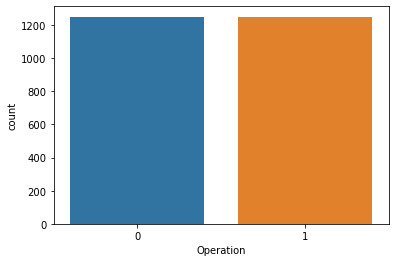

In [18]:
sns.countplot(patients['Operation'],label="Count")
plt.show()

# Correlation Check

In [19]:
patients.corr()

,Patient_ID,Age,Bone,Blood,Lung,Skin,Urological,Heart,Other,Criticality,Operation
Patient_ID,1.000000,0.007397,0.047456,0.024094,0.030261,0.035089,-0.017745,0.032704,0.030825,0.023343,0.015518
Age,0.007397,1.000000,-0.013379,-0.017121,0.025407,0.004194,0.013435,-0.010723,0.007558,-0.001954,0.279358
Bone,0.047456,-0.013379,1.000000,0.227860,0.250278,0.200081,-0.065386,0.241890,0.246951,0.007217,0.044102
Blood,0.024094,-0.017121,0.227860,1.000000,0.215579,0.214793,-0.016317,0.243860,0.226402,-0.027343,-0.014961
Lung,0.030261,0.025407,0.250278,0.215579,1.000000,0.139930,-0.034724,0.246369,0.279450,-0.017831,0.030637
Skin,0.035089,0.004194,0.200081,0.214793,0.139930,1.000000,-0.030605,0.191700,0.177752,-0.005618,0.012694
Urological,-0.017745,0.013435,-0.065386,-0.016317,-0.034724,-0.030605,1.000000,-0.039000,-0.050100,0.007375,-0.029047
Heart,0.032704,-0.010723,0.241890,0.243860,0.246369,0.191700,-0.039000,1.000000,0.246147,-0.012639,0.011341
Other,0.030825,0.007558,0.246951,0.226402,0.279450,0.177752,-0.050100,0.246147,1.000000,-0.003517,-0.003759
Criticality,0.023343,-0.001954,0.007217,-0.027343,-0.017831,-0.005618,0.007375,-0.012639,-0.003517,1.000000,0.383495


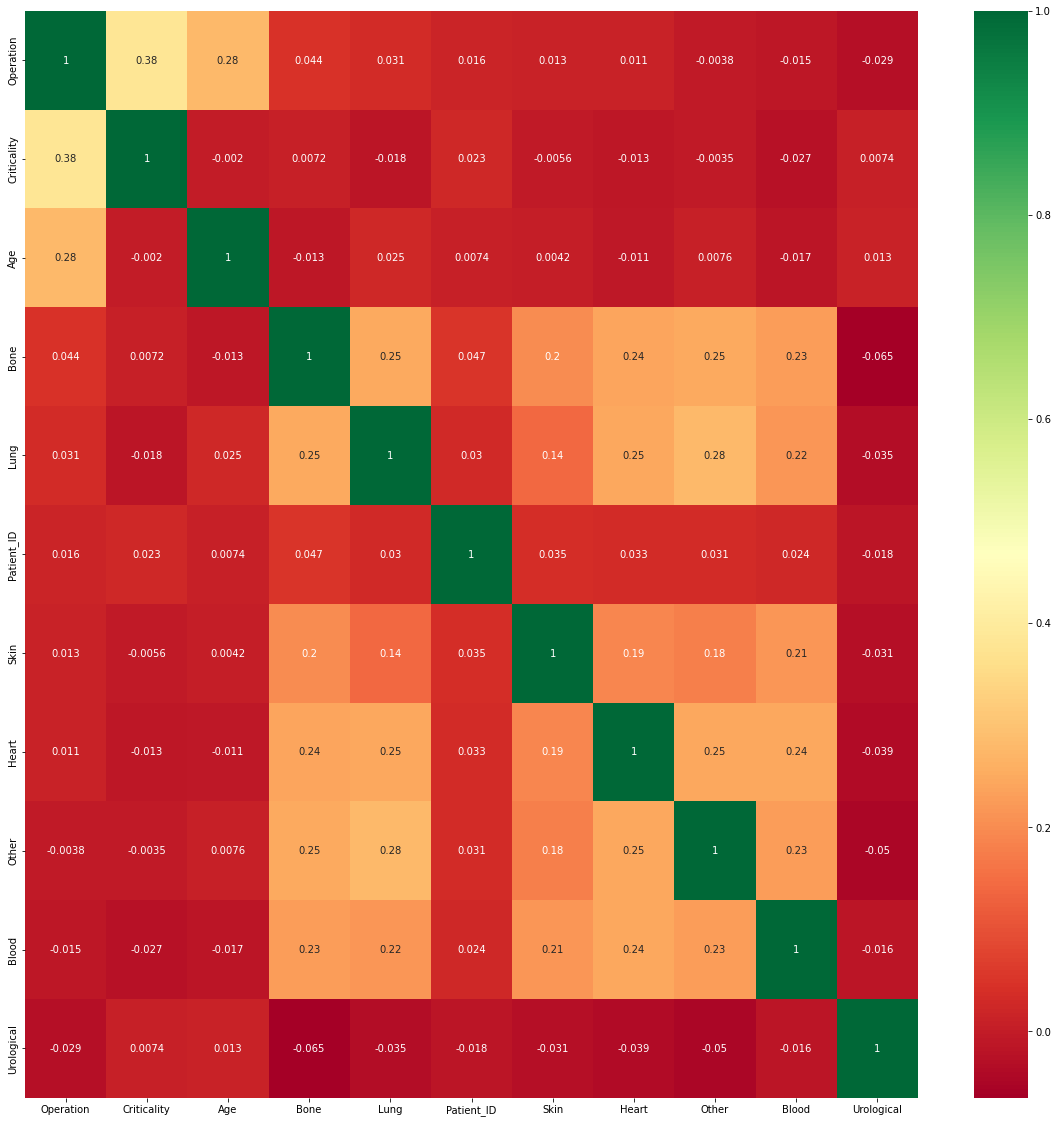

In [20]:
X=patients.drop(['Operation'],axis=1)
y=X=patients[['Operation']]
#get correlations of each features in dataset
corrmat = patients.corr()
top_corr_features = corrmat.nlargest(30, 'Operation')['Operation'].index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(patients[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Histogram

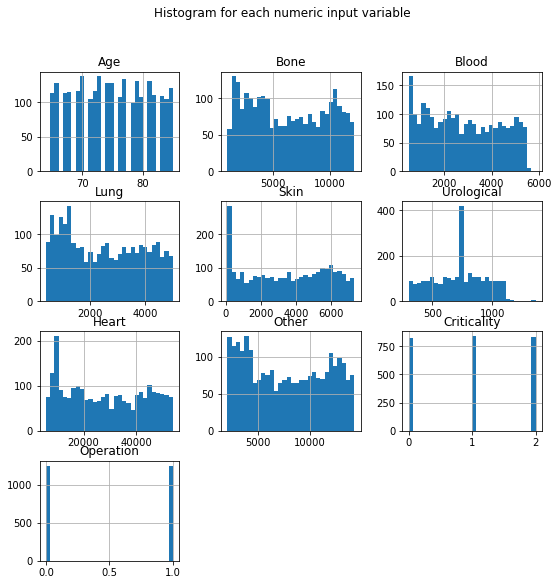

In [21]:
feature_drop = ['Patient_ID','Region',]
patients.drop(feature_drop ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('patients_hist')
plt.show()

# Pair Plots

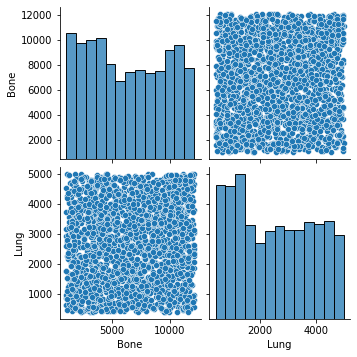

In [28]:
sns.pairplot(patients[['Bone', 'Lung']])

# Insights

<AxesSubplot:xlabel='Age'>

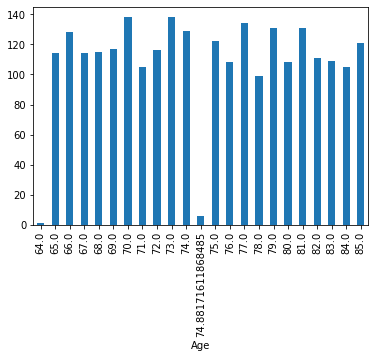

In [22]:
#Relation of Age with Critical patients
patients.groupby('Age')['Criticality'].count().plot(kind='bar')

<AxesSubplot:xlabel='Region'>

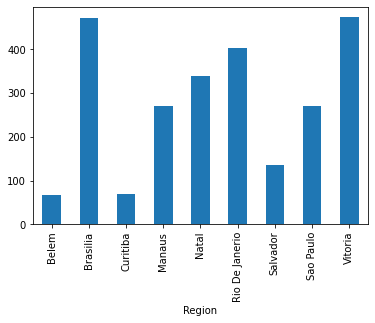

In [30]:
#Region with highest patient count
patients.groupby(['Region'])['Patient_ID'].count().plot(kind='bar')

<AxesSubplot:xlabel='Criticality,Operation'>

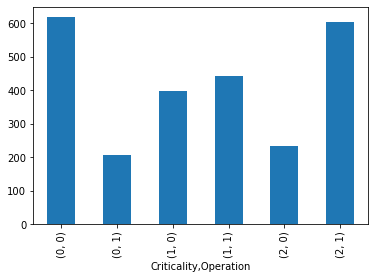

In [23]:
#Which category of criticality is favoured for operation?
patients.groupby(['Criticality','Operation'])['Patient_ID'].count().plot(kind='bar')

<AxesSubplot:ylabel='Patient_ID'>

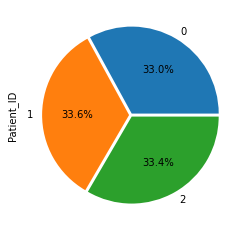

In [24]:
#Divison of Criticality with patient count percentage
patients.groupby('Criticality')['Patient_ID'].count().plot(kind='pie',explode=(0.02, 0.02, 0.02),autopct='%1.1f%%')

# Data Preparation

In [90]:
feature_names = ['Age', 'Bone', 'Blood','Lung','Skin','Urological','Heart','Other','Criticality','Patient_ID']
X = patients[feature_names]
y = patients['Operation']

# Train Test Split

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [92]:
X_train_user_id = X_train['Patient_ID']

In [93]:
X_train = X_train.drop('Patient_ID',axis=1)

In [94]:
X_test_user_id = X_test['Patient_ID']

In [109]:
X_test_user_id = X_test_user_id.to_frame()

In [95]:
X_test = X_test.drop('Patient_ID',axis=1)

# Scaling

In [100]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Model

In [101]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

# Accuracy Check

In [102]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.65
Accuracy of Logistic regression classifier on test set: 0.68


------------------------------------------------------------------------------------------------------------------

# Classification of Eligibility of Patients to go through Operation (Part-2)

# Train Test Split with test size

In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

# Scaling

In [104]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Model

In [105]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

# Accuracy Check

In [106]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.65
Accuracy of Logistic regression classifier on test set: 0.69


In [107]:
predictions = logreg.predict(X_test)

In [113]:
df_dt=pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
df_dt

,Actual,Predicted
1449,1,1
1116,1,0
1066,1,1
2289,1,1
1539,1,1
...,...,...
429,1,1
106,1,1
2046,1,0
122,1,0


In [119]:
X_test_user_id

,Patient_ID
1449,45233
1116,47860
1066,47404
2289,54061
1539,53257
...,...
769,46143
2005,50831
1728,52230
1890,48919


In [120]:
df_dt.append(X_test_user_id,axis=1)

TypeError: append() got an unexpected keyword argument 'axis'

In [54]:
X_test

array([[0.66666667, 0.25391367, 0.72515313, ..., 0.54965811, 0.59597536,
        1.        ],
       [0.61904762, 0.30974572, 0.20885201, ..., 0.38638259, 0.16082136,
        0.        ],
       [0.66666667, 0.40150213, 0.98340249, ..., 0.82338225, 0.1276386 ,
        0.5       ],
       ...,
       [0.9047619 , 0.29065243, 0.53487453, ..., 0.91825801, 0.98094456,
        0.        ],
       [0.57142857, 0.32187132, 0.39063426, ..., 0.30509923, 0.12780287,
        0.        ],
       [0.80952381, 0.65478237, 0.50246987, ..., 0.94302452, 0.63737166,
        0.5       ]])

In [41]:
df_dt.to_csv(r'C:\Users\rawat\Downloads\df_dt.csv')

##Confusion matrix

The confusion matrix lays out correctly and incorrectly classified cases. For the binary (two-class) case the confusion matrix is organized as the matrix in the above cell for logistic regression.

Here the four elements in the matrix are defined as:
True Positive or TP are cases with positive labels which have been correctly classified as positive.
True Negative or TN are cases with negative labels which have been correctly classified as negative.
False Positive or FP are cases with negative labels which have been incorrectly classified as positive.
False Negative or FN are cases with positive labels which have been incorrectly classified as negative.

When creating a confusion matrix it is important to understand and maintain a convention for which differentiating positive and negative label values. The usual convention is to call the 
1
 case positive and the 
0
 case negative.

Notice that there is an ambiguity in which case is considered positive and which is considered negative when the confusion matrix is computed. Whenever you examine a confusion matrix it is a good idea to spend a moment and decide which case is which. This step will help you relate the results to the problem at hand.

##Accuracy

Accuracy is a simple and often misused metric. In simple terms, accuracy is the fraction of cases correctly classified.

 
Accuracy can be quite misleading. For example, say a classifier is used to detect the eligibility of operationwith 0.7 accuracy can be misleading as well as it is giving a score based on current scenario which not necessarily gives assurance of future prediction. In this case where data is balanced, accuracy can be considered as a measure of evaluation.

##Precision

Precision is the fraction of correctly classified label cases out of all cases classified with that label value. 

In other words, the precision statistic is the number of correctly classified cases for the label value divided by all the cases in the column. Thus, precision is sensitive to the number of cases correctly classified for a given score value.This tells when you predict something positive, how many times they were actually positive

##Recall

Recall is the fraction of cases of a label value correctly classified out of all cases that actually have that label value. 

In other words, the recall statistic is the number of correctly classified cases for the label value divided by all the cases in the row. Thus, recall is sensitive to the number of cases correctly classified for a given true label value. This tells out of actual positive data, how many times you predicted correctly.

##F1

The F1 statistic is weighted average of precision and recall. We can express F1 by the following relationship:
In other words, F1 is a weighted metric for overall model performance.

##ROC and AUC

The receiver operating characteristic or ROC is a curve that displays the relationship between the true positive rate on the vertical axis and false positive rate on the horizontal axis. The ROC curve shows the tradeoff between true positive rate and false positive rate. An example is illustrated below.

In principle, you can pick the desired operating point for a classifier on this curve. Towards the left favors low false positive rate at the expense of true positive rate. Towards the right favors high true positive rate at the expense of higher false positive rate.

In [44]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, auc,roc_curve

print('Precision of logistic regression classifier on test set: {:.2f}'
      .format(precision_score(y_test, predictions)))
print('Recall of logistic regression classifier on test set: {:.2f}'
      .format(recall_score(y_test, predictions)))

Precision of logistic regression classifier on test set: 0.72
Recall of logistic regression classifier on test set: 0.68


In [45]:
#Classification Report
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[250 105]
 [126 269]]
              precision    recall  f1-score   support

           0       0.66      0.70      0.68       355
           1       0.72      0.68      0.70       395

    accuracy                           0.69       750
   macro avg       0.69      0.69      0.69       750
weighted avg       0.69      0.69      0.69       750



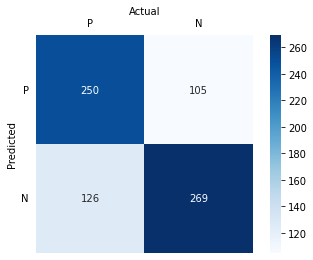

In [46]:
cf_matrix = confusion_matrix(y_test, predictions)
ax = sns.heatmap(
    cf_matrix,
    xticklabels='PN', yticklabels='PN',
    annot=True, square=True,
    cmap='Blues', fmt='', cbar_kws={'format': '%.0f'}
)

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.tick_params(top=False, bottom=False, left=False, right=False)
plt.yticks(rotation=0)

plt.show()

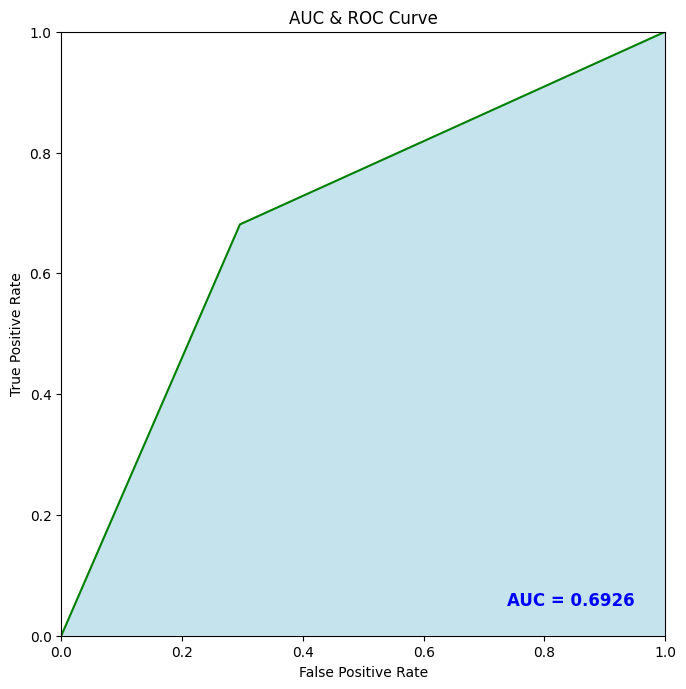

In [47]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, predictions)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, predictions)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Logistic Regression with hyperparameter tuning

In [48]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()
solvers = ['newton-cg', 'sag','lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1,0.01,0.001]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=21)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

pred_logreg = grid_result.predict(X_test)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.655810 using {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
0.641143 (0.027021) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.641143 (0.027021) with: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.641143 (0.027021) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.641143 (0.027021) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.641143 (0.026859) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.641143 (0.026859) with: {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
0.641143 (0.026859) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.641143 (0.027061) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.641524 (0.027953) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.641524 (0.027953) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'sag'}
0.641524 (0.027953) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.641524 (0.027082) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.641333 (0.026215) with: {'C': 0.1,

# Evaluation Metrics for Logistic Regression

In [49]:
print('Precision of logistic regression classifier on test set: {:.2f}'
      .format(precision_score(y_test, pred_logreg)))
print('Recall of logistic regression classifier on test set: {:.2f}'
      .format(recall_score(y_test, pred_logreg)))

Precision of logistic regression classifier on test set: 0.65
Recall of logistic regression classifier on test set: 0.81


In [50]:
print(confusion_matrix(y_test, pred_logreg))
print(classification_report(y_test, pred_logreg))

[[181 174]
 [ 75 320]]
              precision    recall  f1-score   support

           0       0.71      0.51      0.59       355
           1       0.65      0.81      0.72       395

    accuracy                           0.67       750
   macro avg       0.68      0.66      0.66       750
weighted avg       0.68      0.67      0.66       750



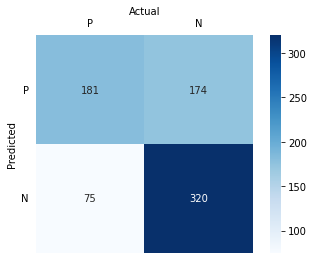

In [51]:
cf_matrix = confusion_matrix(y_test, pred_logreg)
ax = sns.heatmap(
    cf_matrix,
    xticklabels='PN', yticklabels='PN',
    annot=True, square=True,
    cmap='Blues', fmt='', cbar_kws={'format': '%.0f'}
)

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.tick_params(top=False, bottom=False, left=False, right=False)
plt.yticks(rotation=0)

plt.show()

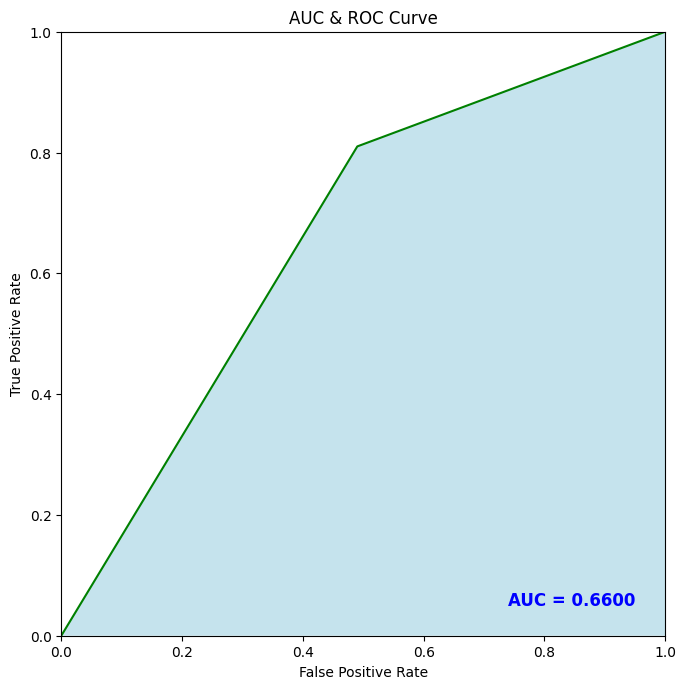

In [52]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, pred_logreg)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, pred_logreg)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
max_features = ['sqrt', 'log2']
max_depth=[2,4,6,8,10]
criterion=['gini','entropy']
max_leaf_nodes = [2,4,6,8]
min_samples_split=[1,2,3,4,5]
ccp_alpha=[0.01,0.02]

# define grid search
grid = dict(max_depth=max_depth,criterion=criterion,min_samples_split=min_samples_split,max_leaf_nodes=max_leaf_nodes,ccp_alpha=ccp_alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=21)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

pred_dt = grid_result.predict(X_test)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.658857 using {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_split': 2}
0.000000 (0.000000) with: {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_split': 1}
0.658857 (0.029698) with: {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_split': 2}
0.658857 (0.029698) with: {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_split': 3}
0.658857 (0.029698) with: {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_split': 4}
0.658857 (0.029698) with: {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_split': 5}
0.000000 (0.000000) with: {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_split': 1}
0.647048 (0.023638) with: {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 4, 'min_

# Evaluation Metrics for Decision Tree

In [54]:
print('Precision of Decision Tree classifier on test set: {:.2f}'
      .format(precision_score(y_test, pred_dt)))
print('Recall of Decision Tree classifier on test set: {:.2f}'
      .format(recall_score(y_test, pred_dt)))

Precision of Decision Tree classifier on test set: 0.65
Recall of Decision Tree classifier on test set: 0.83


In [55]:
print(confusion_matrix(y_test, pred_dt))
print(classification_report(y_test, pred_dt))

[[182 173]
 [ 67 328]]
              precision    recall  f1-score   support

           0       0.73      0.51      0.60       355
           1       0.65      0.83      0.73       395

    accuracy                           0.68       750
   macro avg       0.69      0.67      0.67       750
weighted avg       0.69      0.68      0.67       750



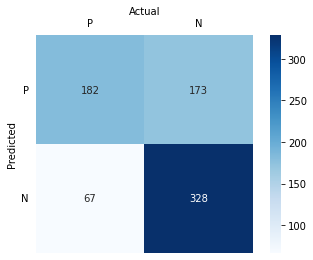

In [56]:
cf_matrix = confusion_matrix(y_test, pred_dt)
ax = sns.heatmap(
    cf_matrix,
    xticklabels='PN', yticklabels='PN',
    annot=True, square=True,
    cmap='Blues', fmt='', cbar_kws={'format': '%.0f'}
)

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.tick_params(top=False, bottom=False, left=False, right=False)
plt.yticks(rotation=0)

plt.show()

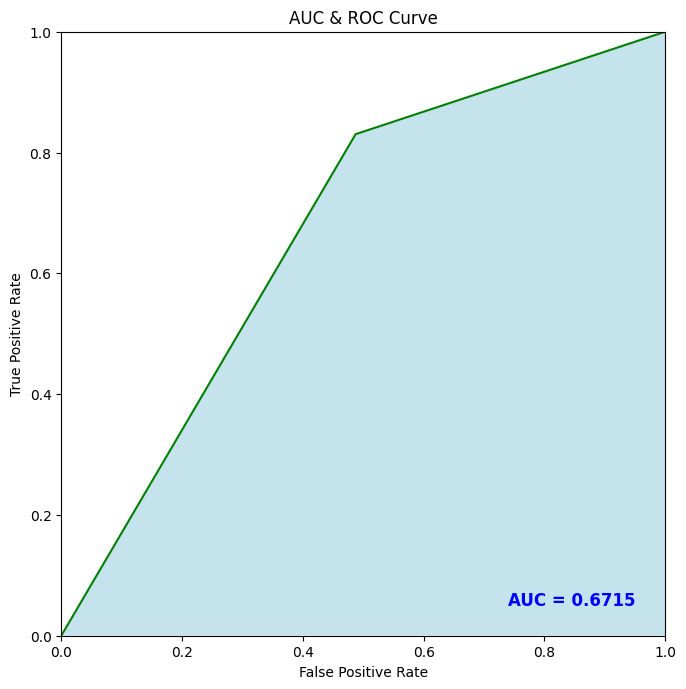

In [57]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, pred_dt)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, pred_dt)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
max_depth=[5,10,15]
criterion=['gini','entropy']
max_leaf_nodes = [2,4,6]
ccp_alpha=[0.01,0.02]

# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features,max_depth=max_depth,criterion=criterion,max_leaf_nodes=max_leaf_nodes,ccp_alpha=ccp_alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=21)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

pred_rf = grid_result.predict(X_test)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.664952 using {'ccp_alpha': 0.02, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 6, 'n_estimators': 10}
0.655619 (0.030841) with: {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'n_estimators': 10}
0.659810 (0.031807) with: {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'n_estimators': 100}
0.663429 (0.031656) with: {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'n_estimators': 1000}
0.654095 (0.029756) with: {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 4, 'n_estimators': 10}
0.654476 (0.029756) with: {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 4, 'n_estimators': 100}
0.653714 (0.029271) with: {'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_l

# Evaluation Metrics for Random Forest

In [59]:
print('Precision of Random Forest classifier on test set: {:.2f}'
      .format(precision_score(y_test, pred_rf)))
print('Recall of Random Forest classifier on test set: {:.2f}'
      .format(recall_score(y_test, pred_rf)))

Precision of Random Forest classifier on test set: 0.66
Recall of Random Forest classifier on test set: 0.82


In [60]:
print(confusion_matrix(y_test, pred_rf))
print(classification_report(y_test, pred_rf))

[[190 165]
 [ 71 324]]
              precision    recall  f1-score   support

           0       0.73      0.54      0.62       355
           1       0.66      0.82      0.73       395

    accuracy                           0.69       750
   macro avg       0.70      0.68      0.67       750
weighted avg       0.69      0.69      0.68       750



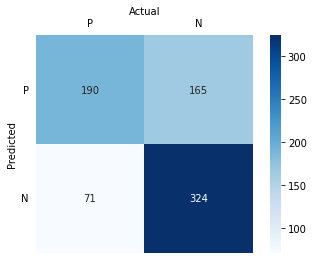

In [61]:
cf_matrix = confusion_matrix(y_test, pred_rf)
ax = sns.heatmap(
    cf_matrix,
    xticklabels='PN', yticklabels='PN',
    annot=True, square=True,
    cmap='Blues', fmt='', cbar_kws={'format': '%.0f'}
)

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.tick_params(top=False, bottom=False, left=False, right=False)
plt.yticks(rotation=0)

plt.show()

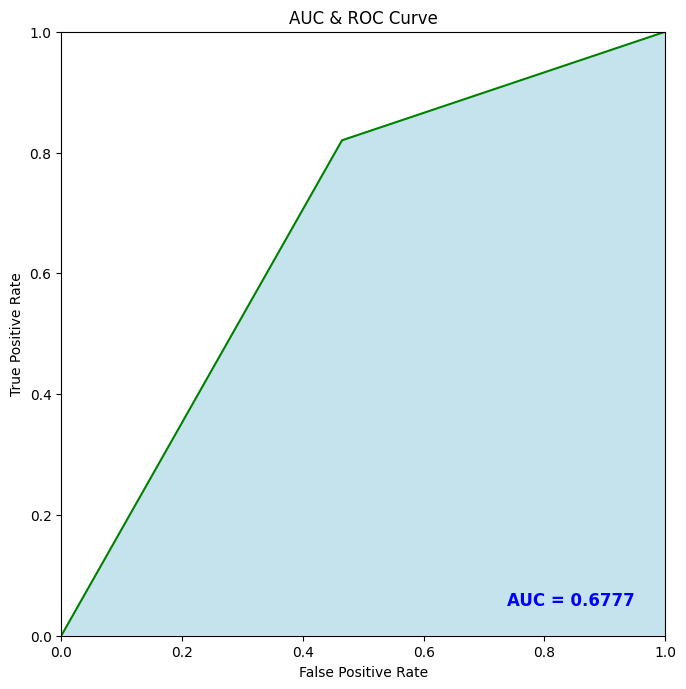

In [62]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, pred_rf)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, pred_rf)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightblue', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Best Model-Decision Tree based on Recall Score for medical cases.

# Statistical Tests

# Logistic Regressions

In [63]:
from scipy.stats import ttest_ind
print("T-test of Logistic Regression and Logistic Regression with Hyperparameter tuning")
ttest_ind(predictions, pred_logreg)

T-test of Logistic Regression and Logistic Regression with Hyperparameter tuning


Ttest_indResult(statistic=-6.354698744245427, pvalue=2.764592722060878e-10)

# Logistic Regression & Decision Tree

In [64]:
from scipy.stats import ttest_ind
print("T-test of Logistic Regression and Decision Tree")
ttest_ind(pred_logreg, pred_dt)

T-test of Logistic Regression and Decision Tree


Ttest_indResult(statistic=-0.38222394790215963, pvalue=0.7023494778947098)

# Decision Tree & Random Forest

In [65]:
from scipy.stats import ttest_ind
print("T-test of Decision Tree & Random Forest")
ttest_ind(pred_dt, pred_rf)

T-test of Decision Tree & Random Forest


Ttest_indResult(statistic=0.6537269778414107, pvalue=0.5133880526414442)